# 🛠 04. Transfer Learning in TensorFlow Part 1: Feature Extraction Exercises

1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction ([`mobilenet_v2_100_224/feature_vector`](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4)) from TensorFlow Hub, how does it perform compared to our other models?
2. Name 3 different image classification models on TensorFlow Hub that we haven't used.
3. Build a model to classify images of two different things you've taken photos of.
  * You can use any feature extraction layer from TensorFlow Hub you like for this.
  * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.
4. What is the current best performing model on ImageNet?
  * Hint: you might want to check [sotabench.com](https://www.sotabench.com) for this.

## 1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction ([`mobilenet_v2_100_224/feature_vector`](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4)) from TensorFlow Hub, how does it perform compared to our other models?

In [1]:
!rm -rf 10_food_classes_10_percent*

# Get data (10% of 10 food classes from Food101)
import zipfile

# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zipref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zipref.extractall()
zipref.close()

!rm -rf __MACOSX*
!rm -rf 10_food_classes_10_percent.zip

--2024-10-24 20:09:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.210.155, 216.58.209.219, 216.58.209.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.210.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  30.4MB/s    in 6.1s    

2024-10-24 20:09:41 (26.5 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import tensorflow as tf

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

print("Training images")
train_data_10_percent = train_data_generator.flow_from_directory(
    train_dir,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
print("Validation images")
test_data_10_percent = test_data_generator.flow_from_directory(
    test_dir,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Training images
Found 750 images belonging to 10 classes.
Validation images
Found 2500 images belonging to 10 classes.


In [3]:
mobile_net_url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/1"

In [4]:
import tensorflow_hub as hub

model_1 = tf.keras.models.Sequential([
    hub.KerasLayer(mobile_net_url, trainable=False, input_shape=IMAGE_SHAPE+(3,)),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_1_his = model_1.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=len(test_data_10_percent)
)

Epoch 1/5
24/24 [==============================] - 9s 214ms/step - loss: 1.9683 - accuracy: 0.3333 - val_loss: 1.2886 - val_accuracy: 0.6356
Epoch 2/5
24/24 [==============================] - 4s 168ms/step - loss: 1.0436 - accuracy: 0.7147 - val_loss: 0.8736 - val_accuracy: 0.7520
Epoch 3/5
24/24 [==============================] - 4s 176ms/step - loss: 0.7418 - accuracy: 0.7960 - val_loss: 0.7687 - val_accuracy: 0.7556
Epoch 4/5
24/24 [==============================] - 4s 167ms/step - loss: 0.5964 - accuracy: 0.8387 - val_loss: 0.6751 - val_accuracy: 0.7888
Epoch 5/5
24/24 [==============================] - 4s 172ms/step - loss: 0.4871 - accuracy: 0.8840 - val_loss: 0.6466 - val_accuracy: 0.7936


In [5]:
# Let's create a function to plot our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history, title=""):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(title)
    
    # Plot loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="Training_loss")
    plt.plot(epochs, val_loss, label="Validation_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="Training_accuracy")
    plt.plot(epochs, val_accuracy, label="Validation_accuracy")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

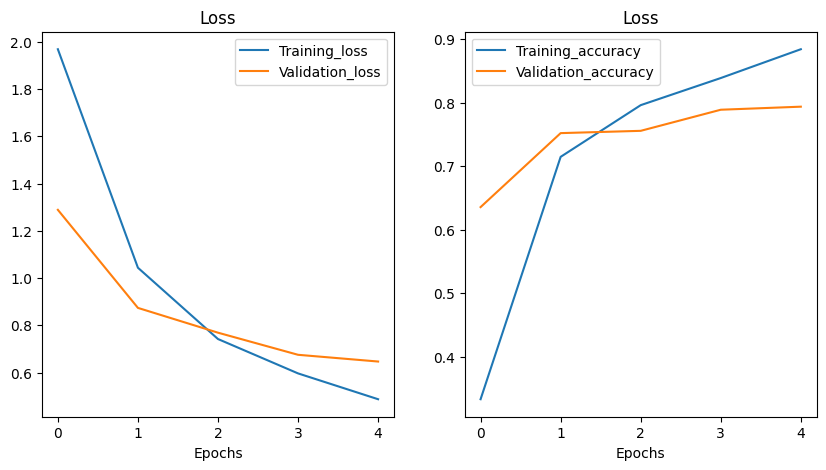

In [6]:
plot_loss_curves(model_1_his)

### How did it perform?

> MobileNet performed about as well as ResNet

## 2. Name 3 different image classification models on TensorFlow Hub that we haven't used.

* [inception v3](https://www.kaggle.com/models/google/inception-v3)
* [bit](https://www.kaggle.com/models/google/bit)
* [deit](https://www.kaggle.com/models/spsayakpaul/deit)

## 3. Build a model to classify images of two different things you've taken photos of.
  * You can use any feature extraction layer from TensorFlow Hub you like for this.
  * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.

In [7]:
!rm -rf cats-and-dogs*
#!wget -q -O cats-and-dogs.zip https://www.kaggle.com/api/v1/datasets/download/samuelcortinhas/cats-and-dogs-image-classification
!wget -q -O cats-and-dogs.zip https://www.kaggle.com/api/v1/datasets/download/anthonytherrien/dog-vs-cat
!unzip -qq -d cats-and-dogs cats-and-dogs.zip
!rm -rf cats-and-dogs.zip

In [8]:
IMGSIZE=224
BATCHSIZE=32

In [9]:
tf.random.set_seed(42)
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.8
)
train_data = train_data_generator.flow_from_directory(
    "cats-and-dogs/animals", 
    target_size=(IMGSIZE,IMGSIZE), 
    batch_size=BATCHSIZE, 
    class_mode="binary",
    subset='training',
    seed=42
)
test_data = train_data_generator.flow_from_directory(
    "cats-and-dogs/animals", 
    target_size=(IMGSIZE,IMGSIZE), 
    batch_size=BATCHSIZE, 
    class_mode="binary",
    subset='validation'
)

Found 200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [10]:
# Create model
model_2 = tf.keras.models.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/bit/TensorFlow2/m-r50x1/1", trainable=False),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_2_his = model_2.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=5,
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
7/7 [==============================] - 18s 1s/step - loss: 0.4498 - accuracy: 0.8050 - val_loss: 0.0572 - val_accuracy: 0.9925
Epoch 2/5
7/7 [==============================] - 7s 1s/step - loss: 0.0252 - accuracy: 0.9950 - val_loss: 0.0098 - val_accuracy: 0.9975
Epoch 3/5
7/7 [==============================] - 7s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 7s 1s/step - loss: 9.8612e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 7s 1s/step - loss: 5.9152e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000


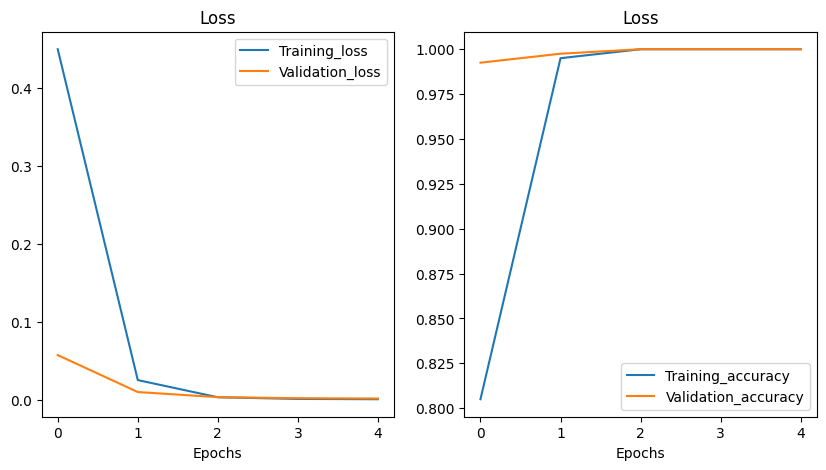

In [11]:
plot_loss_curves(model_2_his)

## 4. What is the current best performing model on ImageNet?

Currently best performing model is **Bit-L (ResNet)**

In [12]:
!rm -rf 10_food_classes_10_percent*
!rm -rf cats-and-dogs*